### How Images are Stored in Memory
Images are typically stored in memory as a three-dimensional array, with dimensions representing the width, height, and the color channels of the image. Two-dimensional array is used for gray-color images.

In Python, we typically handle images using libraries like OpenCV, Pillow, or Scikit-Image. These libraries represent images as NumPy arrays. We can open an image and convert it to a NumPy array like this using Pillow.

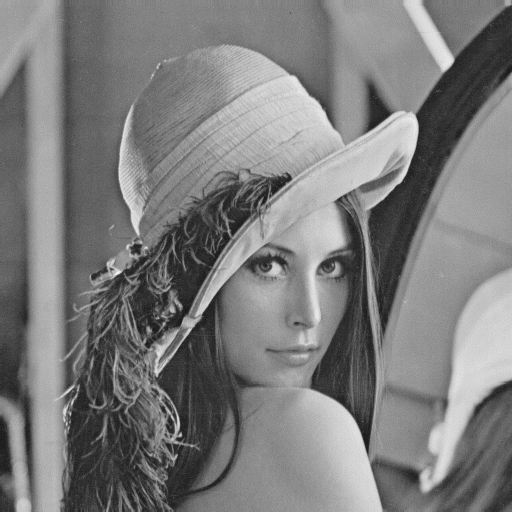

In [2]:
from PIL import Image
import numpy as np

# Open the image file
img = Image.open('images/lena_graycolor.png')
img

### Image Metadata
Image files often contain metadata such as the image's dimensions, color space, compression level, creator, etc. 
This information can be accessed within Python with the use of libraries such as Pillow.

In [3]:
# Access image metadata
print(f"Format: {img.format}") # The file format of the source file.
print(f"Mode: {img.mode}") # The pixel format used by the image.
print(f"Size: {img.size}") # Image size, in pixels. The size is given as a 2-tuple (width, height).
print(f"Info: {img.info}") # A dictionary holding data associated with the image.

Format: PNG
Mode: P
Size: (512, 512)
Info: {}


The info dictionary may contain a lot more metadata, depending on the image file. It can also include `Exif metadata`, which is often found in images taken with digital cameras. This can be accessed using the `_getexif()` function.

In [5]:
# Convert the image to a numpy array
img_array = np.array(img)
img_array.shape

(512, 512)

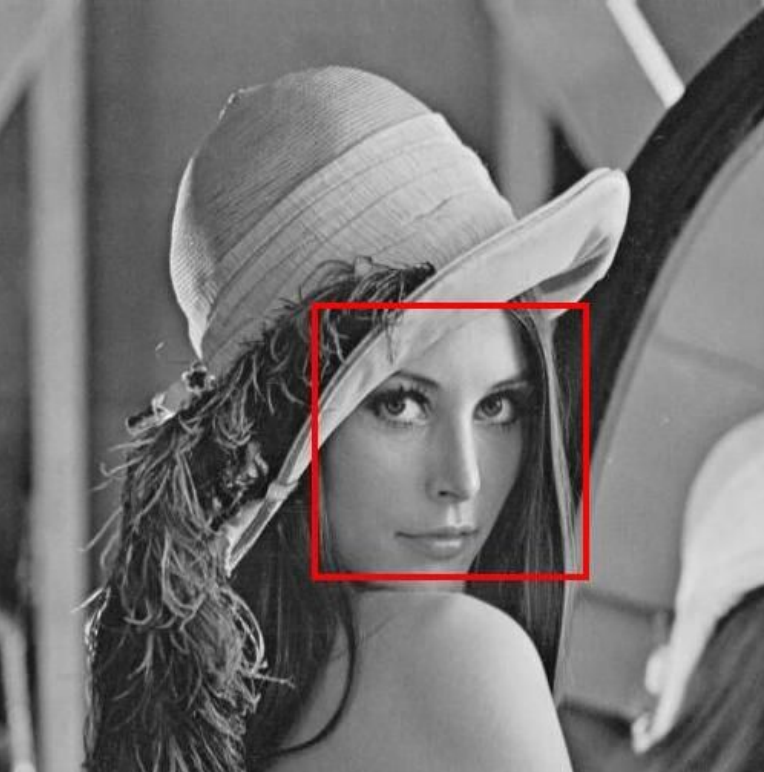

In [6]:
img_color = Image.open('images/lena.png')
img_color

In [7]:
img_color_array = np.array(img_color)
img_color_array.shape

(772, 764, 3)

The resulting `img_color_array` is a 3D NumPy array, where the first dimension represents the height (number of rows), the second dimension represents the width (number of columns), and the third dimension represents the color channels.

### Color Channels and Pixel Values
In a colored image, there are usually 3 color channels: Red, Green, and Blue (RGB). Each pixel in an image is represented by three values, corresponding to the intensity of Red, Green, and Blue colors. Each of these values typically ranges from 0 to 255. So, a pixel with a value of (0,0,0) is black, and (255,255,255) is white.

In [8]:
row_index, col_index = 42, 42
# Now each pixel's RGB values can be accessed by
pixel_value = img_color_array[row_index, col_index]

# The pixel_value will be a list of 3 values [R,G,B]
print(pixel_value)

[160 160 160]


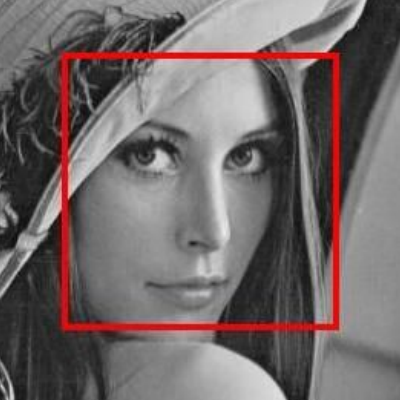

In [14]:
# Crop the image
left, top, right, bottom = 250, 250, 650, 650
crop_img = img_color.crop((left, top, right, bottom))
crop_img

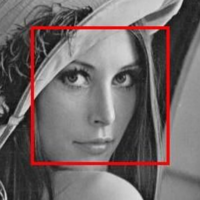

In [15]:
resized_img = crop_img.resize((200, 200))
resized_img

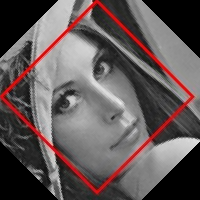

In [16]:
rotated_img = resized_img.rotate(45)
rotated_img

### Applying Filters and Effects
Pillow comes with a module called ImageFilter that contains definitions 
for a pre-built set of filters, which you can use with the `filter()` method.

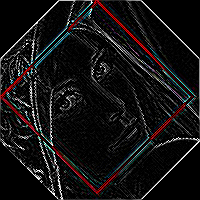

In [19]:
from PIL import ImageFilter

# Blur the image
blurred_img = rotated_img.filter(ImageFilter.FIND_EDGES)
blurred_img

There are many other filters available in the ImageFilter module such as SHARPEN, FIND_EDGES, EMBOSS, BLUR, etc.

### Understanding Compression and Quality
When saving images in certain formats like `JPEG`, you can specify the quality of the image, 
which is essentially a trade-off between file size (and thus, image loading speed) and image accuracy.

In [31]:
# Save with high quality (low compression)
img_color.save('high_quality.jpg', quality=95)

# Save with low quality (high compression)
img_color.save('low_quality.jpg', quality=15)

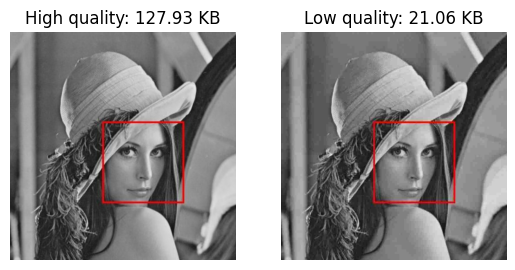

In [32]:
import os
import matplotlib.pyplot as plt

# Get image file paths
image_path1 = 'high_quality.jpg'
image_path2 = 'low_quality.jpg'

# Open images (replace these with your actual images)
img1 = Image.open(image_path1)  
img2 = Image.open(image_path2)

# Create a figure
fig = plt.figure()

# Add first subplot
ax1 = fig.add_subplot(1, 2, 1)  # 1 row, 2 columns, first plot
ax1.imshow(img1)
ax1.set_title('High quality: ' + str(round(os.path.getsize(image_path1)/1024, 2)) + ' KB')
ax1.axis('off')  # Don't show axis

# Add second subplot
ax2 = fig.add_subplot(1, 2, 2)  # 1 row, 2 columns, second plot
ax2.imshow(img2)
ax2.set_title('Low quality: ' + str(round(os.path.getsize(image_path2)/1024, 2)) + ' KB')
ax2.axis('off')  # Don't show axis

# Show the figure with 2 subplots
plt.show()

### Short face recognition demo

Simple library https://github.com/ageitgey/face_recognition

Accuracy achieved — 99.38% on the "Labeled Faces in the Wild" dataset.

As of May 2020, state-of-the-art accuracy was 99.85% (https://github.com/zma-c-137/VarGFaceNet)

We install face_recognition from the Python Package Index (PyPI).

In [36]:
# !pip install face_recognition

In [ ]:
import face_recognition

people_image = face_recognition.load_image_file("images/people.jpg")
# Find all the faces in the image
face_locations = face_recognition.face_locations(people_image)
face_locations

In [ ]:
help(face_recognition.face_locations)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(people_image)

for location in face_locations:
  top, right, bottom, left = location
  # Create a Rectangle patch
  rect = patches.Rectangle((left, top), 
                           width=abs(right - left), height=abs(top - bottom),
                           linewidth=1, edgecolor='g', facecolor='none')
  # Add the patch to the Axes
  ax.add_patch(rect)

plt.show()

In [ ]:
ana_armas = face_recognition.load_image_file("images/ana-armas.jpg")
marta_cabrera = face_recognition.load_image_file("images/marta-cabrera-knives-out.jpg")

In [ ]:
plt.imshow(ana_armas);

In [ ]:
plt.imshow(marta_cabrera);

In [ ]:
second_human_encoding = face_recognition.face_encodings(people_image)[1]
ana_armas_encoding = face_recognition.face_encodings(ana_armas)[0]
marta_cabrera_encoding = face_recognition.face_encodings(marta_cabrera)[0]

# distance is cosine distance
face_recognition.compare_faces([second_human_encoding, ana_armas_encoding], 
                               marta_cabrera_encoding)

### Landmarks

In [ ]:
face_landmarks_list = face_recognition.face_landmarks(ana_armas)

In [ ]:
face_landmarks_list

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


def digital_makeup(image):
  # Find all facial features in all the faces in the image
  face_landmarks_list = face_recognition.face_landmarks(image)

  pil_image = Image.fromarray(image)

  plt.figure(figsize=(15, 15))
  plt.subplot(1, 2, 1)
  plt.imshow(pil_image)

  for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image, 'RGBA')

    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # Gloss the lips
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

    plt.subplot(1, 2, 2)
    plt.imshow(pil_image)


In [ ]:
digital_makeup(ana_armas)

This is roughly how various masks work in Snapchat, FaceApp, and similar applications.